In [7]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split

w[0]: 0.393906  b: -0.031804


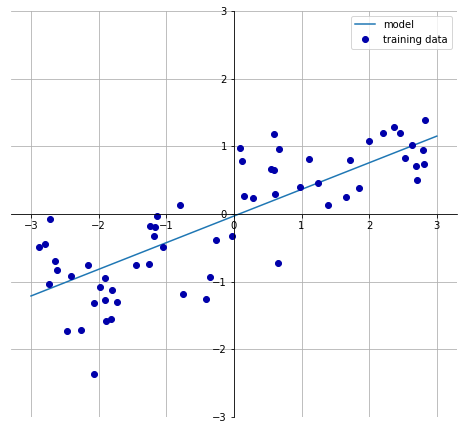

In [5]:
mglearn.plots.plot_linear_regression_wave()

In [8]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [10]:
lr = LinearRegression().fit(X_train, y_train)

In [15]:
lr.coef_ 
# coefficient 系数

array([0.39390555])

In [16]:
lr.intercept_
# interception 截距

-0.031804343026759746

scikit-learn 总是将从训练数据中得出的值保存在以下划线结尾的属性
中。 这是为了将其与用户设置的参数区分开。

我们还可以用 score 方法来评估模型， 对于回归问题， 这一方法返回的是 R2 分数。
R2 分数也叫作决定系数， 是回归模型预测的优度度量， 位于 0 到 1 之间。 R2 等于 1
对应完美预测， R2 等于 0 对应常数模型， 即总是预测训练集响应（ y_train ） 的平均
值

In [17]:
lr.score(X_train, y_train)

0.6700890315075756

In [19]:
lr.score(X_test, y_test)

0.65933685968637

波士顿房价数据集。 记住， 这个
数据集有 506 个样本和 105 个导出特征。

In [20]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
lr.score(X_train, y_train)

0.9523526436864239

In [24]:
lr.score(X_test, y_test)

0.6057754892935622

训练集和测试集之间的性能差异是过拟合的明显标志， 因此我们应该试图找到一个可
以控制复杂度的模型。 标准线性回归最常用的替代方法之一就是岭回归 （ ridge
regression） ， 下面来看一下

岭回归也是一种用于回归的线性模型， 因此它的预测公式与普通最小二乘法相同。 但
在岭回归中， 对系数（ w ） 的选择不仅要在训练数据上得到好的预测结果， 而且还要
拟合附加约束。 我们还希望系数尽量小。 换句话说， w 的所有元素都应接近于 0。 直
观上来看， 这意味着每个特征对输出的影响应尽可能小（ 即斜率很小） ， 同时仍给出
很好的预测结果。 这种约束是所谓正则化 （ regularization） 的一个例子。 正则化是指
对模型做显式约束， 以避免过拟合。 岭回归用到的这种被称为 L2 正则化。 

In [25]:
from sklearn.linear_model import Ridge

In [26]:
ridge = Ridge().fit(X_train, y_train)

In [27]:
ridge.score(X_train, y_train)

0.8860578560395836

In [28]:
ridge.score(X_test, y_test)

0.7527139600306947

Ridge 模型在模型的简单性（ 系数都接近于 0） 与训练集性能之间做出权衡。 简单性
和训练集性能二者对于模型的重要程度可以由用户通过设置 alpha 参数来指定。 在前
面的例子中， 我们用的是默认参数 alpha=1.0 。 但没有理由认为这会给出最佳权
衡。 alpha 的最佳设定值取决于用到的具体数据集。 增大 alpha 会使得系数更加趋向
于 0， 从而降低训练集性能， 但可能会提高泛化性能。 

In [30]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

In [31]:
ridge10.score(X_test, y_test)

0.6358967327447731

In [32]:
ridge10.score(X_train, y_train)

0.7883461511233251

In [33]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

In [34]:
ridge01.score(X_train, y_train)

0.9285782082010736

In [35]:
ridge01.score(X_test, y_test)

0.7717933688844973

In [55]:
X_train.shape

(379, 104)

In [54]:
ridge10.coef_.shape

(104,)

In [53]:
ridge10.intercept_

25.00844754532261

In [59]:
lr.coef_.shape

(104,)

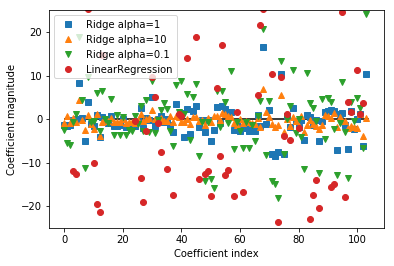

In [67]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

这里 x 轴对应 coef_ 的元素： x=0 对应第一个特征的系数， x=1 对应第二个特征的系
数， 以此类推， 一直到 x=100 。 y 轴表示该系数的具体数值。 这里需要记住的是， 对
于 alpha=10 ， 系数大多在 -3 和 3 之间。 对于 alpha=1 的 Ridge 模型， 系数要稍大一
点。 对于 alpha=0.1 ， 点的范围更大。 对于没有做正则化的线性回归（ 即 alpha=0
） ， 点的范围很大， 许多点都超出了图像的范围。

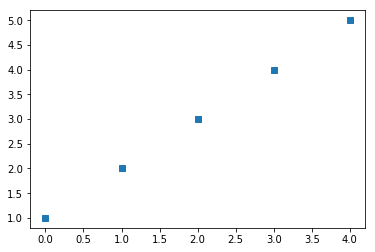

In [68]:
plt.plot(np.array([1,2,3,4,5]), 's')

还有一种方法可以用来理解正则化的影响， 就是固定 alpha 值， 但改变训练数据量。
对于图 2-13 来说， 我们对波士顿房价数据集做二次抽样， 并在数据量逐渐增加的子
数据集上分别对 LinearRegression 和 Ridge(alpha=1) 两个模型进行评估（ 将模型性
能作为数据集大小的函数进行绘图， 这样的图像叫作学习曲线 ） 

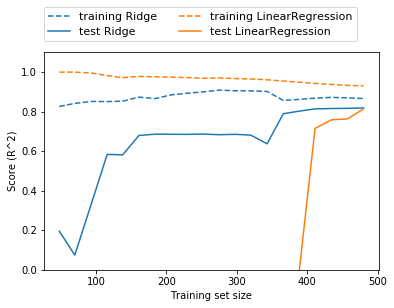

In [69]:
mglearn.plots.plot_ridge_n_samples()

这里要记住的是， 如果有足够多的训
练数据， 正则化变得不那么重要， 并且岭回归和线性回归将具有相同的性能（ 在这个
例子中， 二者相同恰好发生在整个数据集的情况下， 这只是一个巧合） 。 图 2-13 中
还有一个有趣之处， 就是线性回归的训练性能在下降。 如果添加更多数据， 模型将更
加难以过拟合或记住所有的数据。

In [70]:
from sklearn.linear_model import Lasso

In [72]:
lasso = Lasso().fit(X_train, y_train)

In [85]:
lasso.score(X_train, y_train)

0.29323768991114596

In [84]:
lasso.score(X_test, y_test)

0.20937503255272272

In [91]:
np.sum(lasso.coef_!=0)

4

0.20937503255272272